In [1]:
#anomaly_data2.csv
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('anomaly_data2.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [3]:
df

,cpu_usage,memory_usage,timestamp
0,33.512495,500029.940718,2023-12-04 22:00:00+00:00
1,29.268888,499976.246774,2023-12-04 22:05:00+00:00
2,30.358837,500080.385487,2023-12-04 22:10:00+00:00
3,35.063998,500004.069365,2023-12-04 22:15:00+00:00
4,21.756007,499876.861183,2023-12-04 22:20:00+00:00
...,...,...,...
9995,43.327759,671208.507414,2024-01-08 14:55:00+00:00
9996,36.268165,670921.484967,2024-01-08 15:00:00+00:00
9997,40.028437,671005.974915,2024-01-08 15:05:00+00:00
9998,44.154303,671080.080928,2024-01-08 15:10:00+00:00


In [4]:
cpu_data = df[['cpu_usage', 'timestamp']]
memory_data = df[['memory_usage', 'timestamp']]

In [5]:
cpu_data['cpu_usage'] = (cpu_data['cpu_usage']/100)

C:\Users\HP\AppData\Local\Temp\ipykernel_22616\3427748149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpu_data['cpu_usage'] = (cpu_data['cpu_usage']/100)


In [6]:
cpu_data

,cpu_usage,timestamp
0,0.335125,2023-12-04 22:00:00+00:00
1,0.292689,2023-12-04 22:05:00+00:00
2,0.303588,2023-12-04 22:10:00+00:00
3,0.350640,2023-12-04 22:15:00+00:00
4,0.217560,2023-12-04 22:20:00+00:00
...,...,...
9995,0.433278,2024-01-08 14:55:00+00:00
9996,0.362682,2024-01-08 15:00:00+00:00
9997,0.400284,2024-01-08 15:05:00+00:00
9998,0.441543,2024-01-08 15:10:00+00:00


<AxesSubplot: xlabel='timestamp'>

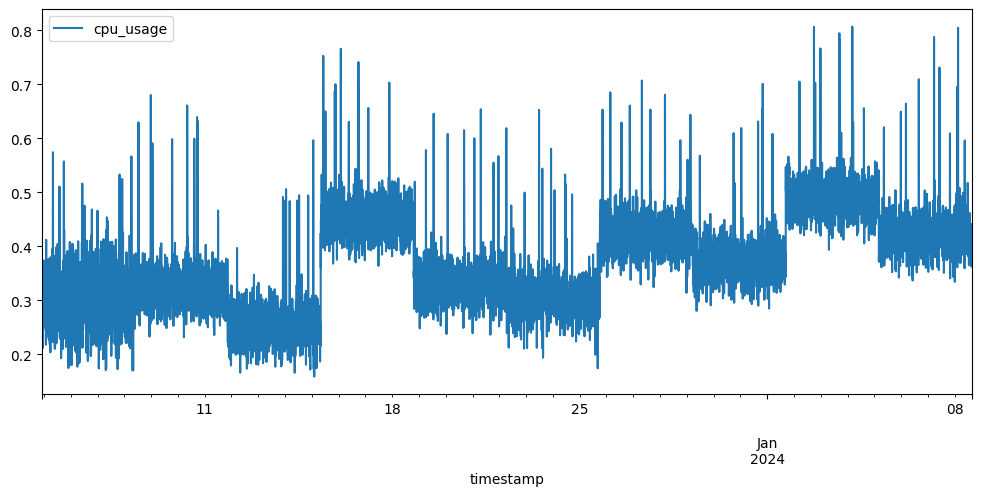

In [7]:
cpu_data.plot(x='timestamp', y='cpu_usage', figsize=(12, 5))

In [8]:
cpu_data['lag_1'] = cpu_data['cpu_usage'].shift(1)
cpu_data['lag_2'] = cpu_data['cpu_usage'].shift(2)

In [9]:
cpu_data = cpu_data.dropna()
cpu_data

,cpu_usage,timestamp,lag_1,lag_2
2,0.303588,2023-12-04 22:10:00+00:00,0.292689,0.335125
3,0.350640,2023-12-04 22:15:00+00:00,0.303588,0.292689
4,0.217560,2023-12-04 22:20:00+00:00,0.350640,0.303588
5,0.223023,2023-12-04 22:25:00+00:00,0.217560,0.350640
6,0.349599,2023-12-04 22:30:00+00:00,0.223023,0.217560
...,...,...,...,...
9995,0.433278,2024-01-08 14:55:00+00:00,0.424970,0.383699
9996,0.362682,2024-01-08 15:00:00+00:00,0.433278,0.424970
9997,0.400284,2024-01-08 15:05:00+00:00,0.362682,0.433278
9998,0.441543,2024-01-08 15:10:00+00:00,0.400284,0.362682


In [10]:
X_cpu = cpu_data[['cpu_usage', 'lag_1', 'lag_2']].to_numpy()
X_cpu

array([[0.30358837, 0.29268888, 0.33512495],
       [0.35063998, 0.30358837, 0.29268888],
       [0.21756007, 0.35063998, 0.30358837],
       ...,
       [0.40028437, 0.36268165, 0.43327759],
       [0.44154303, 0.40028437, 0.36268165],
       [0.42094822, 0.44154303, 0.40028437]])

In [11]:
model = tf.keras.models.load_model('cpu_model_2.h5')

In [12]:
cpu_predict = model.predict(X_cpu)

313/313 [==============================] - 0s 1ms/step


In [13]:
cpu_predict = np.where(cpu_predict > 0.5, 1, 0)

In [14]:

cpu_data['anomaly'] = cpu_predict
cpu_data

C:\Users\HP\AppData\Local\Temp\ipykernel_22616\3191537491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpu_data['anomaly'] = cpu_predict


,cpu_usage,timestamp,lag_1,lag_2,anomaly
2,0.303588,2023-12-04 22:10:00+00:00,0.292689,0.335125,0
3,0.350640,2023-12-04 22:15:00+00:00,0.303588,0.292689,0
4,0.217560,2023-12-04 22:20:00+00:00,0.350640,0.303588,0
5,0.223023,2023-12-04 22:25:00+00:00,0.217560,0.350640,0
6,0.349599,2023-12-04 22:30:00+00:00,0.223023,0.217560,0
...,...,...,...,...,...
9995,0.433278,2024-01-08 14:55:00+00:00,0.424970,0.383699,0
9996,0.362682,2024-01-08 15:00:00+00:00,0.433278,0.424970,0
9997,0.400284,2024-01-08 15:05:00+00:00,0.362682,0.433278,0
9998,0.441543,2024-01-08 15:10:00+00:00,0.400284,0.362682,0


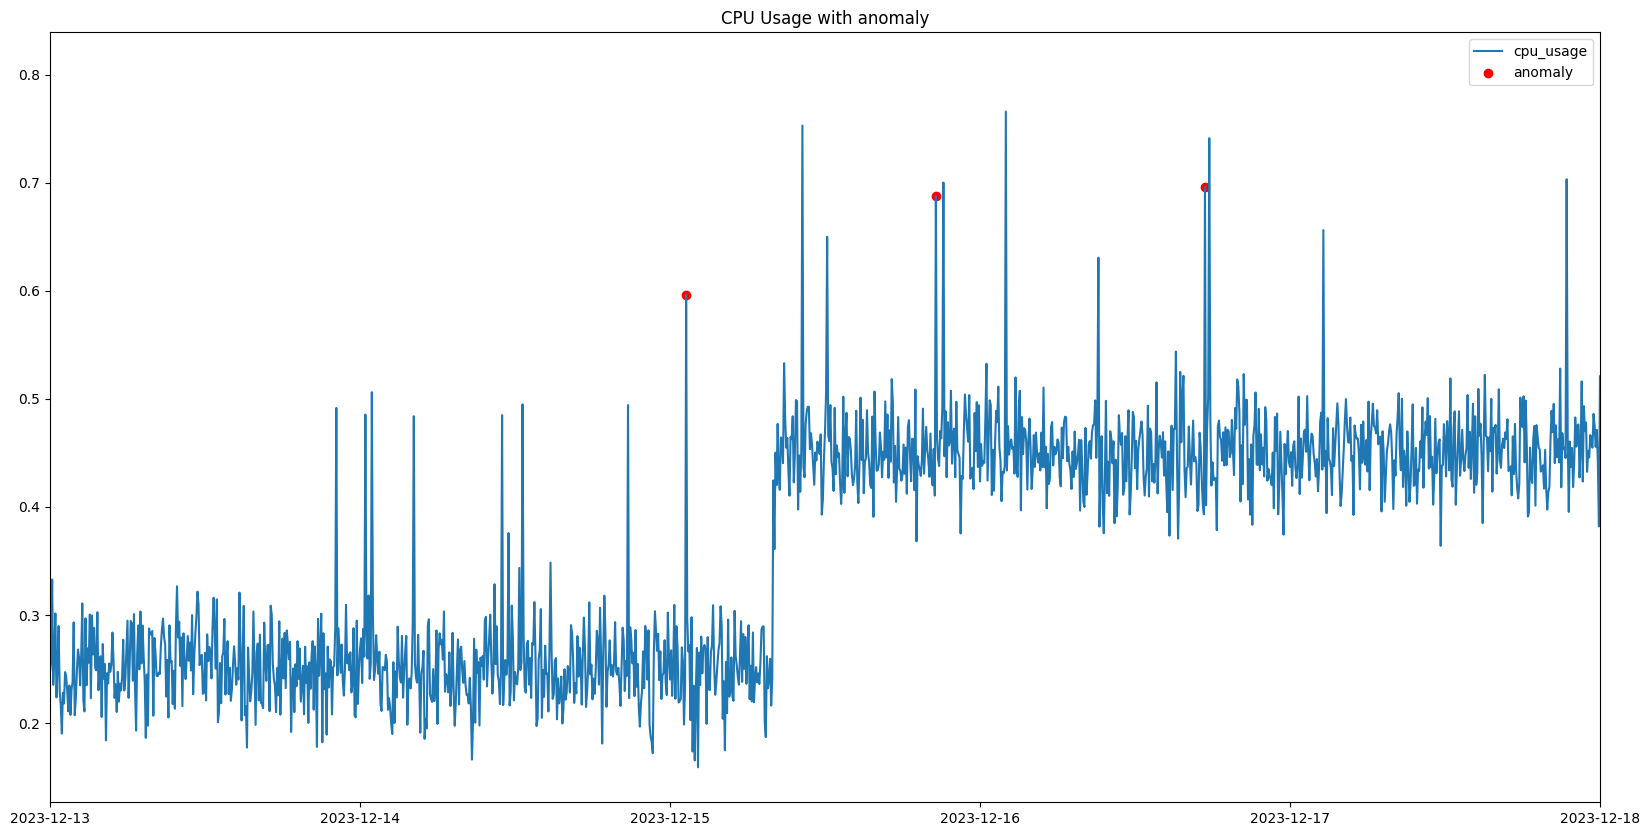

In [34]:
plt.figure(figsize=(20,10))
plt.plot(cpu_data['timestamp'], cpu_data['cpu_usage'], label='cpu_usage')
plt.scatter(cpu_data[cpu_data['anomaly'] == 1]['timestamp'], cpu_data[cpu_data['anomaly'] == 1]['cpu_usage'], color='red', label='anomaly')
plt.legend()
plt.xlim(pd.Timestamp('2023-12-13'), pd.Timestamp('2023-12-18'))
plt.title('CPU Usage with anomaly')
plt.show()
